In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
dataset = pd.read_csv('/content/openb_pod_list_cpu0.csv')
# View the first few rows
print(dataset.head())


             name  cpu_milli  memory_mib  num_gpu  gpu_milli  gpu_spec qos  \
0  openb-pod-0000      12000       16384        1       1000       NaN  LS   
1  openb-pod-0001       6000       12288        1        460       NaN  LS   
2  openb-pod-0002      12000       24576        1       1000       NaN  LS   
3  openb-pod-0003       6000       12288        1        460       NaN  LS   
4  openb-pod-0004      12000       16384        1       1000       NaN  LS   

  pod_phase  creation_time  deletion_time  scheduled_time  
0   Running              0       12537496             0.0  
1   Running         427061       12902960        427061.0  
2   Running        1558381       12902960       1558381.0  
3   Running        2690044       12902960       2690044.0  
4   Running        2758084       12902960       2758084.0  


In [17]:
# Drop irrelevant or empty columns
dataset = dataset.drop(columns=['gpu_spec'], errors='ignore')

In [18]:
# Fill missing values in scheduled_time with median
dataset['scheduled_time'] = dataset['scheduled_time'].fillna(dataset['scheduled_time'].median())

In [19]:
# Convert time-related columns to hours
dataset['creation_time_hr'] = dataset['creation_time'] / 3600
dataset['deletion_time_hr'] = dataset['deletion_time'] / 3600
dataset['scheduled_time_hr'] = dataset['scheduled_time'] / 3600


In [35]:
# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 0, 'CPU (millicores)')

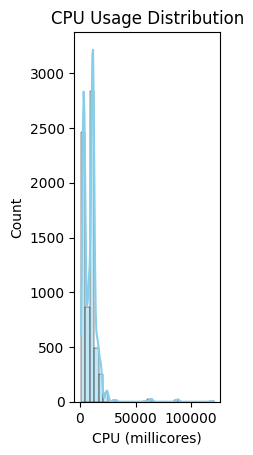

In [23]:
# CPU usage distribution
plt.subplot(1, 3, 1)
sns.histplot(dataset['cpu_milli'], bins=30, kde=True, color='skyblue')
plt.title("CPU Usage Distribution")
plt.xlabel("CPU (millicores)")

Text(0.5, 0, 'Memory (MiB)')

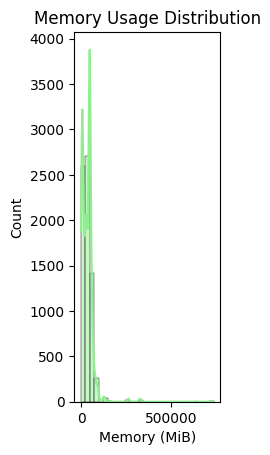

In [25]:
# Memory usage distribution
plt.subplot(1, 3, 2)
sns.histplot(dataset['memory_mib'], bins=30, kde=True, color='lightgreen')
plt.title("Memory Usage Distribution")
plt.xlabel("Memory (MiB)")


Text(0.5, 0, 'GPU (millicores)')

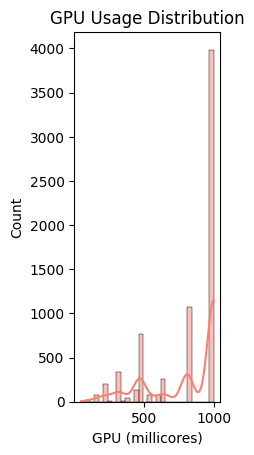

In [26]:
# GPU usage distribution
plt.subplot(1, 3, 3)
sns.histplot(dataset['gpu_milli'], bins=30, kde=True, color='salmon')
plt.title("GPU Usage Distribution")
plt.xlabel("GPU (millicores)")

In [27]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [28]:
# Step 3: Clustering Model with Sk-learn
# Select features for clustering
X = dataset[['cpu_milli', 'memory_mib', 'gpu_milli', 'creation_time_hr', 'scheduled_time_hr']]


In [29]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Use KMeans to find clusters
kmeans = KMeans(n_clusters=3, random_state=0)
dataset['cluster'] = kmeans.fit_predict(X_scaled)

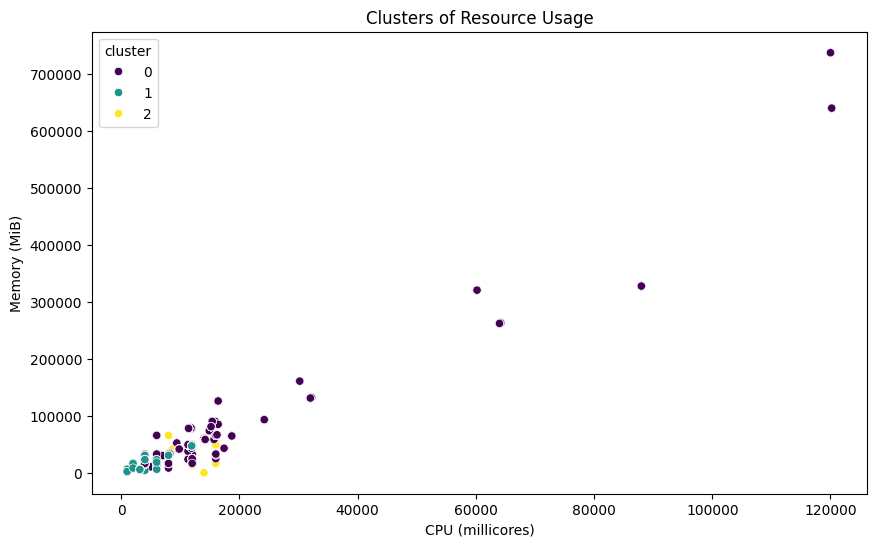

In [31]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='cpu_milli', y='memory_mib', hue='cluster', palette='viridis')
plt.title("Clusters of Resource Usage")
plt.xlabel("CPU (millicores)")
plt.ylabel("Memory (MiB)")
plt.show()

In [32]:
# Step 4: NLP - Processing QoS or Text-based Fields (if available)
# Example NLP processing using hypothetical 'description' field
if 'description' in dataset.columns:
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Apply TF-IDF to extract features from descriptions
    vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
    tfidf_matrix = vectorizer.fit_transform(dataset['description'].fillna(''))

    # Convert TF-IDF matrix to DataFrame and merge with original dataset
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    dataset = pd.concat([dataset, tfidf_df], axis=1)

In [33]:
# The final dataset now includes cluster labels and processed text features
print(dataset.head())

             name  cpu_milli  memory_mib  num_gpu  gpu_milli qos pod_phase  \
0  openb-pod-0000      12000       16384        1       1000  LS   Running   
1  openb-pod-0001       6000       12288        1        460  LS   Running   
2  openb-pod-0002      12000       24576        1       1000  LS   Running   
3  openb-pod-0003       6000       12288        1        460  LS   Running   
4  openb-pod-0004      12000       16384        1       1000  LS   Running   

   creation_time  deletion_time  scheduled_time  creation_time_hr  \
0              0       12537496             0.0          0.000000   
1         427061       12902960        427061.0        118.628056   
2        1558381       12902960       1558381.0        432.883611   
3        2690044       12902960       2690044.0        747.234444   
4        2758084       12902960       2758084.0        766.134444   

   deletion_time_hr  scheduled_time_hr  cluster  
0       3482.637778           0.000000        2  
1       3584.155